In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, time
import re
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
# matplotlib 한글 깨짐 해결
from matplotlib import rc

rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('../2023빅콘테스트_어드밴스드리그_예술의전당.csv')
data.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,...,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,...,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,...,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


In [4]:
data['place'].unique()

array(['콘서트홀', '리사이틀홀', 'IBK챔버홀'], dtype=object)

## 데이터 확인

In [5]:
# '콘서트홀'만 필터링
concert = data[data['place'] == '콘서트홀']
concert

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [6]:
data.shape

(1920868, 24)

In [7]:
concert.shape

(1096968, 24)

In [8]:
# 콘서트홀 데이터 비중 (57.1%)
1096968/1920868

0.5710793245553573

In [9]:
concert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096968 entries, 0 to 1920864
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   age                484517 non-null   float64
 1   gender             484867 non-null   object 
 2   membership_type_1  484867 non-null   object 
 3   membership_type_2  389737 non-null   object 
 4   membership_type_3  140468 non-null   object 
 5   membership_type_4  25160 non-null    object 
 6   membership_type_5  1110 non-null     object 
 7   membership_type_6  0 non-null        float64
 8   tran_date          1096968 non-null  int64  
 9   tran_time          1096968 non-null  int64  
 10  play_date          1096968 non-null  int64  
 11  play_st_time       1096968 non-null  int64  
 12  seat               1096968 non-null  object 
 13  price              1096968 non-null  int64  
 14  ticket_cancel      1096968 non-null  int64  
 15  discount_type      1096968 non-null  

In [10]:
# 칼럼별 null값 개수 확인
concert.isna().sum()

age                   612451
gender                612101
membership_type_1     612101
membership_type_2     707231
membership_type_3     956500
membership_type_4    1071808
membership_type_5    1095858
membership_type_6    1096968
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         395645
open_date                  0
genre                  25073
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

In [11]:
# 중복 확인
concert[concert.duplicated()]

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
373565,30.0,M,무료,NaN,NaN,NaN,NaN,NaN,20200103,28,...,2,일반,1141,20191229.0,20191230.0,독주,콘서트홀,120,15,Y
506440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230517,1505,...,2,문화릴레이(1인2매/공연유료티켓제시)10%,2824,20230505.0,20230507.0,교향곡,콘서트홀,120,15,N
627490,30.0,M,무료,NaN,NaN,NaN,NaN,NaN,20200103,28,...,2,조기예매 할인30%,1141,20191229.0,20191230.0,독주,콘서트홀,120,15,Y
719290,50.0,F,골드,무료,그린,NaN,NaN,NaN,20191201,1510,...,2,공연예매권,1700,20191129.0,20191130.0,교향곡,콘서트홀,120,15,Y
763897,60.0,F,블루,무료,NaN,NaN,NaN,NaN,20230610,133,...,2,장애인/국가유공자 할인50%,2830,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1081296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230407,1136,...,2,초대권,2775,NaN,20230408.0,교향곡,콘서트홀,80,20,N
1195792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230606,4,...,2,문화릴레이(1인2매/공연유료티켓제시)10%,2820,20230505.0,20230507.0,교향곡,콘서트홀,120,15,N
1351945,60.0,F,골드,무료,NaN,NaN,NaN,NaN,20191210,1649,...,2,골드회원 할인10%,317,NaN,20200704.0,교향곡,콘서트홀,120,15,Y
1467863,30.0,F,무료,싹틔우미,그린,NaN,NaN,NaN,20190902,12,...,2,일반,44,20190616.0,20190621.0,교향곡,콘서트홀,100,0,Y
1566078,30.0,F,무료,싹틔우미,그린,NaN,NaN,NaN,20190902,12,...,2,일반,44,20190616.0,20190621.0,교향곡,콘서트홀,100,0,Y


In [12]:
# 14개 중복 drop
concert.drop_duplicates(inplace=True)

/tmp/ipykernel_4108/3040057603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert.drop_duplicates(inplace=True)


In [13]:
# 중복 제거 후 데이터 shape
concert.shape

(1096954, 24)

In [14]:
concert.isna().sum()

age                   612448
gender                612098
membership_type_1     612098
membership_type_2     707223
membership_type_3     956489
membership_type_4    1071794
membership_type_5    1095844
membership_type_6    1096954
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         395642
open_date                  0
genre                  25073
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

In [16]:
# age missing prop
print('age NA:', 612448/1096954)
# gender missing prop
print('gender NA:', 612098/1096954)

age NA: 0.5583169394523381
gender NA: 0.5579978741132262


## EDA

### 1. age, gender

    age, gender 칼럼 결측치는 채울 수 없음. 사용자 유추 불가
    -> 어쩌면 age는 힌트가 있을지도? 


In [17]:
concert['gender'].isnull().sum()

612098

In [18]:
concert['gender'].value_counts()

gender
F    315597
M    169259
Name: count, dtype: int64

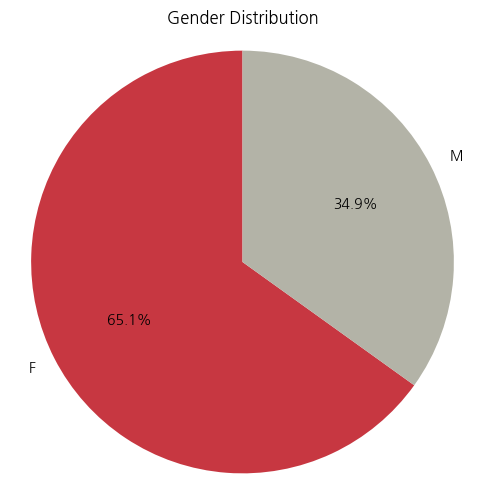

In [22]:
gender_counts = concert['gender'].value_counts()

plt.figure(figsize=(6, 6))
colors = ['#C73741', '#B3B3A7', '#8A794C', '#489F95', '#2E6CA6', '#54375B']

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [18]:
concert['age'].value_counts()

50.0    115541
40.0    114612
30.0     85723
60.0     77726
20.0     59081
70.0     21729
80.0      6321
10.0      3773
Name: age, dtype: int64

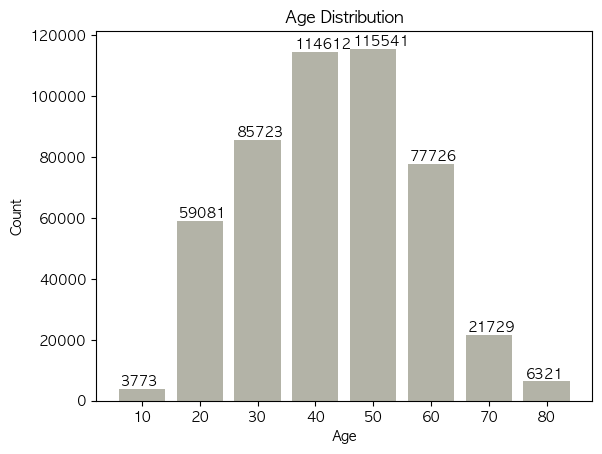

In [19]:
x = concert['age'].value_counts().index
y = concert['age'].value_counts().values
bars = plt.bar(x, y, width=8, color='#B3B3A7')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 각 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/20.0, yval, int(yval), va='bottom')

plt.show()

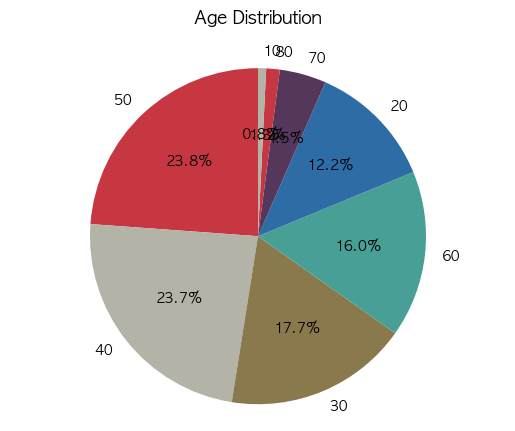

In [20]:
age_data = {
    50:    115541,
    40:    114612,
    30:    85723,
    60:    77726,
    20:    59081,
    70:    21729,
    80:     6321,
    10:     3773,
}

labels = [f'{age}' for age in age_data.keys()]
sizes = list(age_data.values())
colors = ['#C73741', '#B3B3A7', '#8A794C', '#489F95', '#2E6CA6', '#54375B']
# plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Age Distribution', loc='center', pad=20, fontsize=13)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


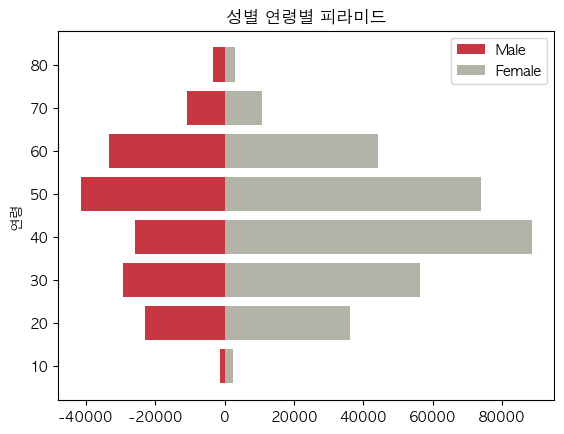

In [21]:
# 성별 연령
df_male = concert[concert['gender'] =='M']['age']
df_female = concert[concert['gender']=='F']['age']
# plt.barh(concert['age'].value_counts().index)
plt.barh(df_male.value_counts().index.astype(int), -df_male.value_counts().values, height=8, color='#C73741', label='Male')
plt.barh(df_female.value_counts().index.astype(int), df_female.value_counts().values, height=8, color='#B3B3A7', label='Female')
plt.title('성별 연령별 피라미드')
plt.ylabel('연령')
plt.legend()

plt.show()

### 2. ticket_cancel

In [22]:
concert['ticket_cancel'].value_counts()

0    864120
2    232834
Name: ticket_cancel, dtype: int64

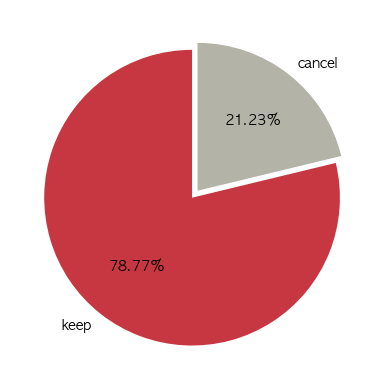

In [23]:
ratio = [concert['ticket_cancel'].value_counts()[0], concert['ticket_cancel'].value_counts()[2]]
labels = ['keep', 'cancel']
explode = [0.03, 0.03]
colors = ['#C73741', '#B3B3A7']

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, explode=explode, colors=colors)
plt.show()

    데이터의 21.23%는 취소 티켓

    티켓 취소한 사람들 특징 파악하기

In [24]:
# 취소 티켓 걸러내기
cancel = concert[concert['ticket_cancel']==2]

In [25]:
cancel.describe(include='all')

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
count,194808.000000,194845,194845,165619,67049,13295,570,0.0,2.328340e+05,232834.000000,...,232834.0,232834,232834.000000,1.600650e+05,2.328340e+05,227893,232834,232834.000000,232834.000000,232834
unique,NaN,2,3,5,4,3,1,NaN,NaN,NaN,...,NaN,644,NaN,NaN,NaN,13,1,NaN,NaN,2
top,NaN,F,무료,무료,그린,그린,그린,NaN,NaN,NaN,...,NaN,일반,NaN,NaN,NaN,교향곡,콘서트홀,NaN,NaN,Y
freq,NaN,133419,85460,82382,32156,10829,570,NaN,NaN,NaN,...,NaN,65545,NaN,NaN,NaN,118241,232834,NaN,NaN,194808
mean,43.021334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.021278e+07,1308.747365,...,2.0,NaN,1292.270141,2.021391e+07,2.021215e+07,NaN,NaN,111.306897,14.079924,NaN
std,14.229688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.477181e+04,559.061730,...,0.0,NaN,927.686723,1.459912e+04,1.515302e+04,NaN,NaN,16.140207,6.188289,NaN
min,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018110e+07,0.000000,...,2.0,NaN,1.000000,2.018103e+07,2.018103e+07,NaN,NaN,0.000000,0.000000,NaN
25%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020051e+07,1034.000000,...,2.0,NaN,441.000000,2.021021e+07,2.020070e+07,NaN,NaN,100.000000,15.000000,NaN
50%,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022022e+07,1403.000000,...,2.0,NaN,1141.000000,2.022041e+07,2.022012e+07,NaN,NaN,120.000000,15.000000,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022121e+07,1627.000000,...,2.0,NaN,2085.000000,2.022122e+07,2.022121e+07,NaN,NaN,120.000000,15.000000,NaN


In [26]:
# 취소하지 않은 티켓 걸러내서 특징 파악
keep = concert[concert['ticket_cancel']==0]
keep.describe(include='all')

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
count,289698.000000,290011,290011,224112,73416,11865,540,0.0,8.641200e+05,864120.000000,...,864120.0,864120,864120.000000,5.412470e+05,8.641200e+05,843988,864120,864120.000000,864120.000000,864120
unique,NaN,2,3,5,4,3,1,NaN,NaN,NaN,...,NaN,706,NaN,NaN,NaN,13,1,NaN,NaN,2
top,NaN,F,무료,무료,무료,그린,그린,NaN,NaN,NaN,...,NaN,초대권,NaN,NaN,NaN,교향곡,콘서트홀,NaN,NaN,N
freq,NaN,182178,144983,111317,33711,8725,540,NaN,NaN,NaN,...,NaN,368418,NaN,NaN,NaN,404021,864120,NaN,NaN,574422
mean,43.017004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020936e+07,1404.307274,...,0.0,NaN,1399.689466,2.020943e+07,2.020880e+07,NaN,NaN,111.309410,14.483515,NaN
std,14.869672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.580954e+04,400.467228,...,0.0,NaN,916.505276,1.556145e+04,1.599904e+04,NaN,NaN,16.675841,5.749007,NaN
min,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018110e+07,0.000000,...,0.0,NaN,1.000000,2.018103e+07,2.018103e+07,NaN,NaN,0.000000,0.000000,NaN
25%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019091e+07,1126.000000,...,0.0,NaN,518.000000,2.019083e+07,2.019081e+07,NaN,NaN,100.000000,15.000000,NaN
50%,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.021102e+07,1419.000000,...,0.0,NaN,1293.000000,2.021092e+07,2.021092e+07,NaN,NaN,120.000000,15.000000,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022103e+07,1639.000000,...,0.0,NaN,2219.000000,2.022091e+07,2.022100e+07,NaN,NaN,120.000000,15.000000,NaN


In [27]:
# 전체 티켓 파악
concert.describe(include='all')

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
count,484506.000000,484856,484856,389731,140465,25160,1110,0.0,1.096954e+06,1.096954e+06,...,1.096954e+06,1096954,1.096954e+06,7.013120e+05,1.096954e+06,1071881,1096954,1.096954e+06,1.096954e+06,1096954
unique,NaN,2,3,5,4,3,1,NaN,NaN,NaN,...,NaN,710,NaN,NaN,NaN,13,1,NaN,NaN,2
top,NaN,F,무료,무료,그린,그린,그린,NaN,NaN,NaN,...,NaN,초대권,NaN,NaN,NaN,교향곡,콘서트홀,NaN,NaN,N
freq,NaN,315597,230443,193699,61284,19554,1110,NaN,NaN,NaN,...,NaN,388825,NaN,NaN,NaN,522262,1096954,NaN,NaN,612448
mean,43.018745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.021008e+07,1.384024e+03,...,4.245101e-01,NaN,1.376889e+03,2.021046e+07,2.020951e+07,NaN,NaN,1.113089e+02,1.439785e+01,NaN
std,14.615704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.565783e+04,4.406821e+02,...,8.178092e-01,NaN,9.199388e+02,1.546184e+04,1.588247e+04,NaN,NaN,1.656359e+01,5.847334e+00,NaN
min,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018110e+07,0.000000e+00,...,0.000000e+00,NaN,1.000000e+00,2.018103e+07,2.018103e+07,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019100e+07,1.117000e+03,...,0.000000e+00,NaN,4.990000e+02,2.019093e+07,2.019091e+07,NaN,NaN,1.000000e+02,1.500000e+01,NaN
50%,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.021111e+07,1.412000e+03,...,0.000000e+00,NaN,1.276000e+03,2.021112e+07,2.021102e+07,NaN,NaN,1.200000e+02,1.500000e+01,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022111e+07,1.637000e+03,...,0.000000e+00,NaN,2.217000e+03,2.022092e+07,2.022102e+07,NaN,NaN,1.200000e+02,1.500000e+01,NaN


    취소 티켓과 아닌 티켓 사이에 유의미한 차이는 없어보임

In [28]:
cancel.member_yn.value_counts()

Y    194808
N     38026
Name: member_yn, dtype: int64

In [29]:
cancel.discount_type.nunique()

644

    discount_type에 차이가 있을까 싶기도 하지만

In [30]:
cancel.discount_type.value_counts()[:15]

일반                 65545
골드회원 할인10%         22746
초대권                20407
그린회원 할인5%          13158
장애인/국가유공자 할인50%     9617
골드회원 할인30%          9466
그린회원 할인10%          8139
블루회원 할인5%           7473
골드회원 할인20%          6785
기획사판매               5602
그린회원 할인20%          4342
싹틔우미 할인40%          4145
블루회원 할인10%          3729
블루회원 할인20%          2721
골드회원 할인40%          2296
Name: discount_type, dtype: int64

In [31]:
keep.discount_type.value_counts()[:15]

초대권                368418
기획사판매              131918
일반                 106892
골드회원 할인10%          29926
골드회원 할인30%          15217
그린회원 할인5%           14477
공연진행석               11471
골드회원 할인20%          10722
블루회원 할인5%            9634
장애인/국가유공자 할인50%      9572
기획사                  9165
싹틔우미 할인40%           8582
그린회원 할인10%           7223
한화초대석                6303
홍보진행                 5594
Name: discount_type, dtype: int64

In [32]:
cancel.age.value_counts()

40.0    50420
50.0    46646
30.0    35466
60.0    29236
20.0    21057
70.0     7694
80.0     3015
10.0     1274
Name: age, dtype: int64

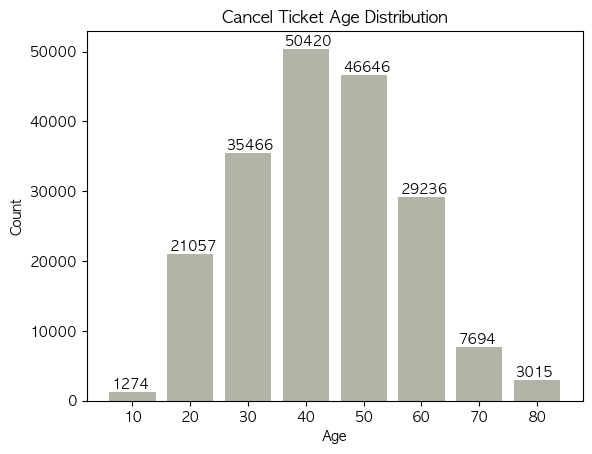

In [33]:
x = cancel['age'].value_counts().index
y = cancel['age'].value_counts().values
bars = plt.bar(x, y, width=8, color='#B3B3A7')

plt.title('Cancel Ticket Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 각 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/20.0, yval, int(yval), va='bottom')

plt.show()

    나이 분포 또한 큰 차이 없어보임

### 3. 멤버십 여부 (member_yn)

In [34]:
concert['member_yn'].value_counts()

N    612448
Y    484506
Name: member_yn, dtype: int64

In [35]:
yn_vc = concert['member_yn'].value_counts().tolist()
yn_vc

[612448, 484506]

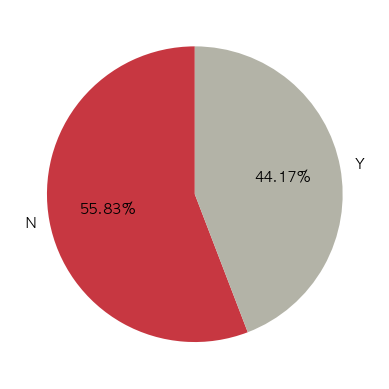

In [36]:
ratio = yn_vc
labels = ['N', 'Y']
colors = ['#C73741', '#B3B3A7']

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, colors=colors)
plt.show()

    데이터의 약 56%가 예술의전당 회원임 (무료회원 포함)

In [37]:
member_yes = concert[concert['member_yn']=='Y']
member_yes.membership_type_1.isnull().sum()

0

In [38]:
member_no = concert[concert['member_yn']=='N']
len(member_no)

612448

In [39]:
member_no.membership_type_1.isnull().sum()

612098

In [40]:
612448-612098

350

In [41]:
member_no['membership_type_1'].unique()

array([nan, '블루', '골드', '무료'], dtype=object)

In [42]:
# 회원이 아닌 예매자들 성별 정보
member_no['gender'].value_counts()

F    218
M    132
Name: gender, dtype: int64

    멤버가 아닌데 회원권이 있다?
    멤버가 아닌데 성별 정보 존재?

### 4. 장르 (genre)

In [43]:
concert['genre'].value_counts().index

Index(['교향곡', '클래식', '합창', '독주', '성악', '실내악', '콘서트', '오페라', '복합장르', '기타', '재즈',
       '크로스오버', '가족극'],
      dtype='object')

    '클래식'은 뭐..지...

    장르 정리 필요할 것으로 판단됨 (성격 비슷한 애들끼리)

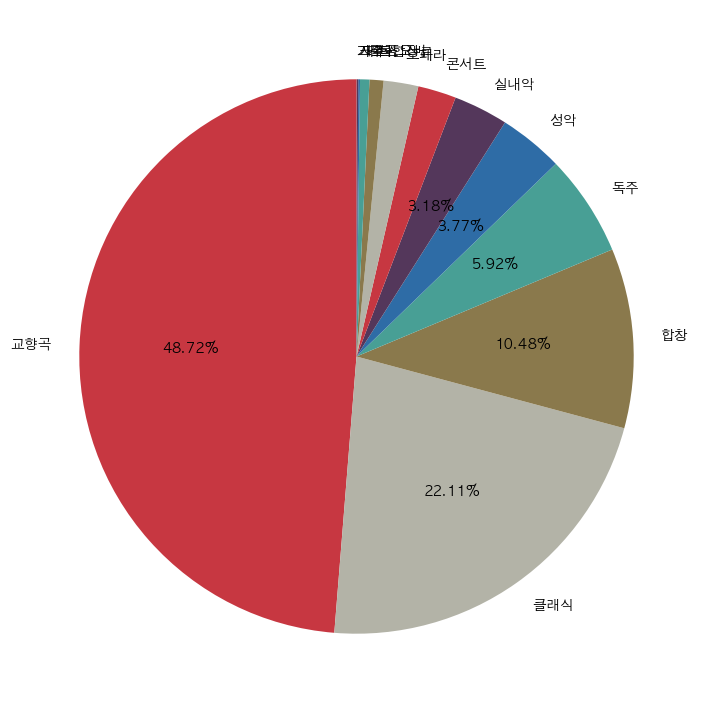

In [44]:
ratio = concert['genre'].value_counts().values
# labels = 
explode = [0.03, 0.03]
colors = ['#C73741', '#B3B3A7', '#8A794C', '#489F95', '#2E6CA6', '#54375B']

def customPct(pct):
    return ('%.2f%%' % pct) if pct >=3 else ''

plt.figure(figsize=(9,9))
# plt.pie(ratio, labels=concert['genre'].value_counts().index, autopct='%.2f%%', startangle=90, colors=colors)
plt.pie(ratio, labels=concert['genre'].value_counts().index, autopct=customPct, startangle=90, colors=colors)
plt.show()

In [45]:
concert['genre'].value_counts(normalize=True)

교향곡      0.487239
클래식      0.221075
합창       0.104766
독주       0.059241
성악       0.037677
실내악      0.031839
콘서트      0.022314
오페라      0.020251
복합장르     0.008121
기타       0.005451
재즈       0.001008
크로스오버    0.000902
가족극      0.000116
Name: genre, dtype: float64

    너무 비율이 작은 것은 통합? 

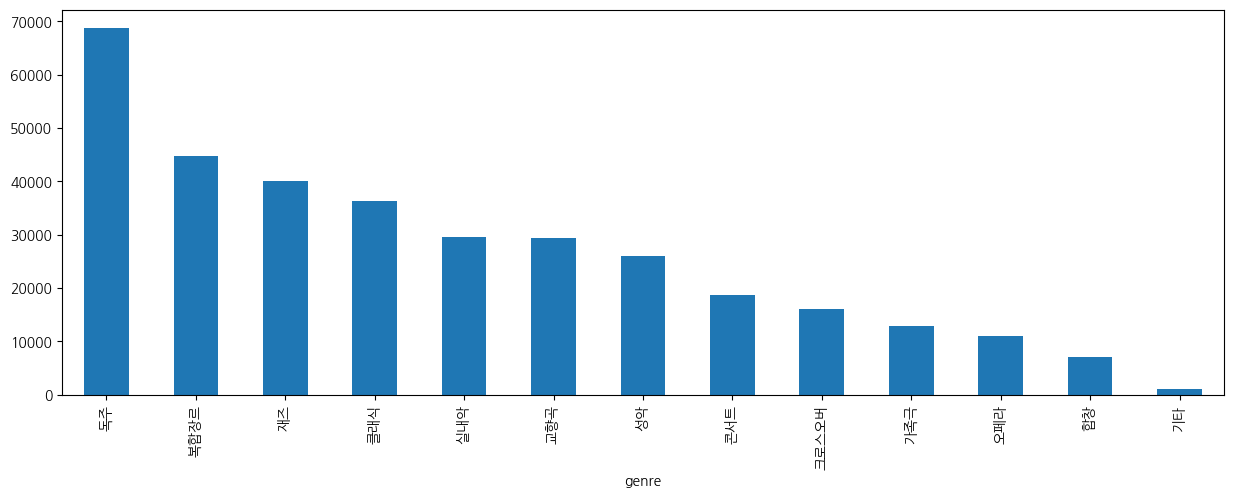

In [23]:
concert.groupby(['genre'])['price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.show()

### 5. 할인 유형 (discount_type)

In [46]:
concert['discount_type'].nunique()

710

In [47]:
concert['discount_type'].unique()

array(['일반', '블루회원 할인20%', '초대권', 'K-lang 멤버십 회원(1인2매)20%', '골드회원 할인30%',
       '기획사판매', '싹틔우미 할인40%', '라흐마니노프탄생150주년(8매/3.27까지)20%', '골드회원 할인10%',
       '장애인/국가유공자 할인50%', '싹딜가(골드)50%', '그린회원 할인5%', '초,중,고,대학생(본인만)30%',
       '조기예매 할인40%', '그린회원 할인20%', '한화초대석', '단체100인이상50%', '공연예매권',
       '초/중/고등학생 할인(본인만)30%', '골드회원 할인25%', '우리카드 우수회원', '골드회원 할인20%',
       '조기예매 할인(1인8매/3월11일까지)30%', '기획사', '신세계석', '골드회원 할인5%', '정기회원',
       '만65세 이상(본인만)50%', '싹딜가(블루)50%', '공연진행석', '그린회원 할인15%',
       '직장인 할인(1인2매)20%', '블루회원 할인10%', '초/중/고/대학생 할인(본인만)50%',
       '문화릴레이(1인2매/공연유료티켓제시)10%', '조기예매 할인10%', 'K-Lang 할인(1인2매)20%',
       '골드회원 할인40%', '초/중/고등학생 할인(본인만)20%', '조기예매 할인(1인2매/~10월31일까지)30%',
       '기업석', '초/중/고/대학생 할인30%', '의사상자(동반1인/신분증지참)50%',
       '초,중,고,대학생(본인만)50%', '조기예매할인(1인8매/~6.30까지)30%', '그린회원 할인10%',
       '블루회원 할인5%', '스탭 할인30%', '홍보진행', 'KOSYMI  유료회원(1인4매)40%',
       '청소년(만 24세 이하/본인만)30%', '얼리버드 할인(1인4매/10월31일까지)10%',
       '패밀리할인(3매이상/1인4매)15%', '싹딜가(그린)60%', 'K

In [48]:
d_type = concert.groupby(['discount_type'])['place'].count().to_frame().reset_index()
d_type = d_type.sort_values(by='place', ascending=False)
d_type

,discount_type,place
629,초대권,388825
413,일반,172437
176,기획사판매,137520
116,골드회원 할인10%,52672
162,그린회원 할인5%,27635
...,...,...
373,예술인패스 할인(본인만)10%,4
709,후원회원 할인50%,4
340,싹틔우미 할인,3
280,블루회원 할인20%_,2


In [49]:
d_type[:20]

,discount_type,place
629,초대권,388825
413,일반,172437
176,기획사판매,137520
116,골드회원 할인10%,52672
162,그린회원 할인5%,27635
122,골드회원 할인30%,24683
434,장애인/국가유공자 할인50%,19189
120,골드회원 할인20%,17507
284,블루회원 할인5%,17107
156,그린회원 할인10%,15362


In [87]:
# 할인 유형 데이터프레임 저장
d_type.to_csv('/Users/jungsuryu/Documents/2023BigCon/discount_type_count.csv', index=False)

### 6. 날짜 및 시간 변환

In [16]:
concert['tran_time'][:10]

0     1512
4     1615
5     1145
6     1459
7      954
9      908
11    1417
13    1618
15    1645
16    2214
Name: tran_time, dtype: int64

In [17]:
# 분을 시간과 분으로 변환하는 함수
def convert_to_time(value):
    hours = value // 100  # 시간은 100으로 나눈 몫
    minutes = value % 100  # 분은 100으로 나눈 나머지
    return f"{hours:02d}:{minutes:02d}"  # 시간과 분을 두 자리 수로 표현

In [18]:
tran_time_series = pd.Series(concert['tran_time'])
play_time_series = pd.Series(concert['play_st_time'])

# 시리즈의 각 값을 시간 형식으로 변환
converted_times = tran_time_series.apply(convert_to_time)
converted_play_times = play_time_series.apply(convert_to_time)

# 변환된 결과 출력
print(converted_times)
print(converted_play_times)

0          15:12
4          16:15
5          11:45
6          14:59
7          09:54
           ...  
1920853    15:09
1920855    17:29
1920856    16:52
1920858    16:55
1920864    12:23
Name: tran_time, Length: 1096954, dtype: object
0          20:00
4          19:30
5          20:00
6          17:00
7          20:00
           ...  
1920853    15:00
1920855    17:00
1920856    19:30
1920858    19:30
1920864    17:00
Name: play_st_time, Length: 1096954, dtype: object


In [19]:
concert['tran_time'] = converted_times
concert['play_st_time'] = converted_play_times

concert

/tmp/ipykernel_30206/1364939150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert['tran_time'] = converted_times
/tmp/ipykernel_30206/1364939150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert['play_st_time'] = converted_play_times


,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,15:12,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,16:15,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,11:45,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,14:59,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,09:54,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,15:09,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,17:29,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,16:52,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,16:55,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [20]:
concert[['play_date', 'tran_date', 'pre_open_date', 'open_date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096954 entries, 0 to 1920864
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   play_date      1096954 non-null  int64  
 1   tran_date      1096954 non-null  int64  
 2   pre_open_date  701312 non-null   float64
 3   open_date      1096954 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 41.8 MB


In [20]:
concert['pre_open_date'].fillna(0, inplace=True)
concert['open_date'].fillna(0, inplace=True)

/tmp/ipykernel_30206/1702880836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert['pre_open_date'].fillna(0, inplace=True)
/tmp/ipykernel_30206/1702880836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert['open_date'].fillna(0, inplace=True)


In [21]:
concert[['pre_open_date', 'open_date']] = concert[['pre_open_date', 'open_date']].astype('int')

/tmp/ipykernel_30206/3955077474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert[['pre_open_date', 'open_date']] = concert[['pre_open_date', 'open_date']].astype('int')


In [22]:
concert[['play_date', 'tran_date', 'pre_open_date', 'open_date']]

,play_date,tran_date,pre_open_date,open_date
0,20220204,20220114,20220114,20220115
4,20220302,20220206,20220109,20220110
5,20190323,20181124,20181119,20181119
6,20191109,20191020,0,20191023
7,20190723,20190613,20190602,20190602
...,...,...,...,...
1920853,20210704,20210618,20210618,20210620
1920855,20230613,20230522,20230505,20230507
1920856,20201020,20201009,0,20200920
1920858,20200818,20200726,20200719,20200720


In [66]:
print(concert.tran_date.min())
print(concert.tran_date.max())

20181101
20230703


In [67]:
print(concert.play_date.min())
print(concert.play_date.max())

20181125
20230707


### 7. 공연id (performance_code)

In [68]:
concert['performance_code'].nunique()

703

In [77]:
# performance_code 별로 정리해두기 위해 데이터프레임 생성
code_list = list(concert['performance_code'].unique())
perf_df = pd.DataFrame({'performance_code': code_list})

perf_df

,performance_code
0,302
1,897
2,528
3,44
4,827
...,...
698,119
699,2932
700,166
701,293


In [78]:
genre_df = concert.groupby(['performance_code'])['genre'].unique().to_frame().reset_index() # 공연별로 몇 개의 다른 price가 있는지 평균적으로 (확인 필요) 등
genre_df

,performance_code,genre
0,1,[클래식]
1,3,[클래식]
2,7,"[클래식, 교향곡]"
3,23,[교향곡]
4,29,[합창]
...,...,...
698,2932,[클래식]
699,2935,[복합장르]
700,2936,[클래식]
701,2937,[nan]


In [79]:
perf_df = pd.merge(perf_df, genre_df)
perf_df

,performance_code,genre
0,302,[교향곡]
1,897,[독주]
2,528,[교향곡]
3,44,[교향곡]
4,827,[교향곡]
...,...,...
698,119,[교향곡]
699,2932,[클래식]
700,166,[교향곡]
701,293,[교향곡]


In [80]:
perf_df['genre_cnt'] = perf_df['genre'].apply(lambda x: len(x))
perf_df

,performance_code,genre,genre_cnt
0,302,[교향곡],1
1,897,[독주],1
2,528,[교향곡],1
3,44,[교향곡],1
4,827,[교향곡],1
...,...,...,...
698,119,[교향곡],1
699,2932,[클래식],1
700,166,[교향곡],1
701,293,[교향곡],1


In [81]:
perf_df[perf_df['genre_cnt']>=2]

,performance_code,genre,genre_cnt
14,1496,"[교향곡, 클래식]",2
15,2215,"[클래식, nan]",2
28,863,"[교향곡, 클래식]",2
55,229,"[nan, 교향곡]",2
123,7,"[클래식, 교향곡]",2
135,646,"[클래식, 교향곡]",2
151,2046,"[교향곡, 클래식]",2
456,2839,"[클래식, 오페라]",2
530,1863,"[합창, 교향곡]",2


In [74]:
code = [7, 646, 863, 1496, 1863, 2046, 2839]

for c in code:
    print('code', c)
    print(concert[concert['performance_code']==c]['genre'].unique())
    print('---')
    

code 7
['클래식' '교향곡']
---
code 646
['클래식' '교향곡']
---
code 863
['교향곡' '클래식']
---
code 1496
['교향곡' '클래식']
---
code 1863
['합창' '교향곡']
---
code 2046
['교향곡' '클래식']
---
code 2839
['클래식' '오페라']
---


    '클래식'이 다른 장르랑 중복적으로 들어가 있는 경우에는 다른 장르를 살리고 갈까?...   
    근데 그럼 '복합장르'는 뭐지

In [82]:
open_df = concert.groupby(['performance_code'])['open_date'].unique().to_frame().reset_index()
perf_df = pd.merge(perf_df, open_df)
perf_df

,performance_code,genre,genre_cnt,open_date
0,302,[교향곡],1,[20220115]
1,897,[독주],1,[20220110]
2,528,[교향곡],1,[20181119]
3,44,[교향곡],1,"[20191023, 20190621]"
4,827,[교향곡],1,[20190602]
...,...,...,...,...
698,119,[교향곡],1,[20210910]
699,2932,[클래식],1,[20191130]
700,166,[교향곡],1,[20211217]
701,293,[교향곡],1,[20210101]


In [83]:
duration_df = concert.groupby(['performance_code'])['running_time'].unique().to_frame().reset_index()
perf_df = pd.merge(perf_df, duration_df)
perf_df

,performance_code,genre,genre_cnt,open_date,running_time
0,302,[교향곡],1,[20220115],[120]
1,897,[독주],1,[20220110],[90]
2,528,[교향곡],1,[20181119],[100]
3,44,[교향곡],1,"[20191023, 20190621]",[100]
4,827,[교향곡],1,[20190602],[120]
...,...,...,...,...,...
698,119,[교향곡],1,[20210910],[120]
699,2932,[클래식],1,[20191130],[100]
700,166,[교향곡],1,[20211217],[120]
701,293,[교향곡],1,[20210101],[120]


In [84]:
play_df = concert.groupby(['performance_code'])['play_date'].unique().to_frame().reset_index()
perf_df = pd.merge(perf_df, play_df)
perf_df

,performance_code,genre,genre_cnt,open_date,running_time,play_date
0,302,[교향곡],1,[20220115],[120],[20220204]
1,897,[독주],1,[20220110],[90],[20220302]
2,528,[교향곡],1,[20181119],[100],[20190323]
3,44,[교향곡],1,"[20191023, 20190621]",[100],"[20191109, 20191108]"
4,827,[교향곡],1,[20190602],[120],[20190723]
...,...,...,...,...,...,...
698,119,[교향곡],1,[20210910],[120],[20211022]
699,2932,[클래식],1,[20191130],[100],[20191225]
700,166,[교향곡],1,[20211217],[120],[20220407]
701,293,[교향곡],1,[20210101],[120],[20210508]


    같은 공연이라도 회차가 여러번이면 play_date가 여러개

In [85]:
intermission_df = concert.groupby(['performance_code'])['intermission'].unique().to_frame().reset_index()
perf_df = pd.merge(perf_df, intermission_df)
perf_df

,performance_code,genre,genre_cnt,open_date,running_time,play_date,intermission
0,302,[교향곡],1,[20220115],[120],[20220204],[15]
1,897,[독주],1,[20220110],[90],[20220302],[0]
2,528,[교향곡],1,[20181119],[100],[20190323],[15]
3,44,[교향곡],1,"[20191023, 20190621]",[100],"[20191109, 20191108]","[15, 0]"
4,827,[교향곡],1,[20190602],[120],[20190723],[20]
...,...,...,...,...,...,...,...
698,119,[교향곡],1,[20210910],[120],[20211022],[15]
699,2932,[클래식],1,[20191130],[100],[20191225],[15]
700,166,[교향곡],1,[20211217],[120],[20220407],[15]
701,293,[교향곡],1,[20210101],[120],[20210508],[15]


In [87]:
play_time_df = concert.groupby(['performance_code'])['play_st_time'].unique().to_frame().reset_index()
perf_df = pd.merge(perf_df, play_time_df)
perf_df

,performance_code,genre,genre_cnt,open_date,running_time,play_date,intermission,play_st_time
0,302,[교향곡],1,[20220115],[120],[20220204],[15],[20:00]
1,897,[독주],1,[20220110],[90],[20220302],[0],[19:30]
2,528,[교향곡],1,[20181119],[100],[20190323],[15],[20:00]
3,44,[교향곡],1,"[20191023, 20190621]",[100],"[20191109, 20191108]","[15, 0]","[17:00, 20:00]"
4,827,[교향곡],1,[20190602],[120],[20190723],[20],[20:00]
...,...,...,...,...,...,...,...,...
698,119,[교향곡],1,[20210910],[120],[20211022],[15],[20:00]
699,2932,[클래식],1,[20191130],[100],[20191225],[15],[20:00]
700,166,[교향곡],1,[20211217],[120],[20220407],[15],[20:00]
701,293,[교향곡],1,[20210101],[120],[20210508],[15],[17:00]


In [148]:
perf_df[perf_df['performance_code']==2217]

,performance_code,genre,genre_cnt,open_date,running_time,play_date,intermission,play_st_time
432,2217,[교향곡],1,[20190614],[0],[20190716],[0],[20:00]


In [149]:
perf_df[perf_df['performance_code']==2495]

,performance_code,genre,genre_cnt,open_date,running_time,play_date,intermission,play_st_time
91,2495,[교향곡],1,[20191013],[0],[20191217],[30],[20:00]


In [150]:
perf_df[perf_df['performance_code']==552]

,performance_code,genre,genre_cnt,open_date,running_time,play_date,intermission,play_st_time
286,552,[합창],1,[20191005],"[0, 140]","[20191210, 20191203]","[0, 20]",[20:00]


In [88]:
# # 코드별 공연 데이터 저장
# perf_df.to_csv('/Users/jungsuryu/Documents/2023BigCon/performance_by_code.csv', index=False)

### 8. 멤버십 (membership_type)

In [89]:
concert.membership_type_1.unique()

array(['골드', '무료', '블루', nan], dtype=object)

In [90]:
concert.membership_type_2.unique()

array(['무료', nan, '그린', '싹틔우미', '골드', '노블'], dtype=object)

In [91]:
concert.membership_type_3.unique()

array(['그린', nan, '무료', '싹틔우미', '노블'], dtype=object)

In [92]:
concert.membership_type_4.unique()

array([nan, '그린', '싹틔우미', '노블'], dtype=object)

In [93]:
concert.membership_type_5.unique()

array([nan, '그린'], dtype=object)

In [94]:
concert.membership_type_6.unique()

array([nan])

- 멤버십을 6개까지 가지고 있는 사람은 없음
- membership_n을 가지고 있는 사람은 < n 를 다 가지고 있는지 확인해보아야

In [59]:
concert['membership_type_1'].isna().sum()

612098

In [60]:
len(concert[concert['membership_type_1']=='무료'])

230443

In [23]:
# 멤버십 정리 (하나의 열로 몰아넣기)
cols = ['membership_type_1', 'membership_type_2', 'membership_type_3', 'membership_type_4', 'membership_type_5', 'membership_type_6']
concert['membership_all'] =concert[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
concert['membership_all']

/tmp/ipykernel_30206/3319146321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert['membership_all'] =concert[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


0             골드 무료 그린 nan nan nan
4           무료 nan nan nan nan nan
5            블루 무료 nan nan nan nan
6          nan nan nan nan nan nan
7          nan nan nan nan nan nan
                    ...           
1920853      무료 그린 nan nan nan nan
1920855     무료 nan nan nan nan nan
1920856    nan nan nan nan nan nan
1920858    nan nan nan nan nan nan
1920864    무료 싹틔우미 nan nan nan nan
Name: membership_all, Length: 1096954, dtype: object

In [24]:
# nan값 등 정리
def merge_memberships(x):
    x = x.replace('nan', '')
    if x.isspace():
        x = re.sub(r"\s+", " ", x)
        x = x.replace(' ', 'nan')
    
    x = x.lstrip().rstrip()

    x = x.replace(' ', '|')

    return x

In [25]:
concert['membership_all'] = concert['membership_all'].apply(lambda x: merge_memberships(x))
concert[['membership_type_1', 'membership_type_2', 'membership_type_3', 'membership_type_4', 'membership_type_5', 'membership_type_6', 'membership_all']]

/tmp/ipykernel_30206/2971477822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert['membership_all'] = concert['membership_all'].apply(lambda x: merge_memberships(x))


,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,membership_all
0,골드,무료,그린,NaN,NaN,NaN,골드|무료|그린
4,무료,NaN,NaN,NaN,NaN,NaN,무료
5,블루,무료,NaN,NaN,NaN,NaN,블루|무료
6,NaN,NaN,NaN,NaN,NaN,NaN,nan
7,NaN,NaN,NaN,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...
1920853,무료,그린,NaN,NaN,NaN,NaN,무료|그린
1920855,무료,NaN,NaN,NaN,NaN,NaN,무료
1920856,NaN,NaN,NaN,NaN,NaN,NaN,nan
1920858,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [28]:
# 멤버십 타입을 칼럼으로 만들기
membership_type = [x.split('|') for x in concert['membership_all'].values]
membership_type[:5]

[['골드', '무료', '그린'], ['무료'], ['블루', '무료'], ['nan'], ['nan']]

In [29]:
import itertools
mems = list(set(list(itertools.chain(*membership_type))))
print(len(membership_type))
print(len(mems))
print(mems)

1096954
7
['골드', '싹틔우미', '그린', '블루', '무료', 'nan', '노블']


In [30]:
membership_df = pd.DataFrame(columns=mems, index=concert.index)
membership_df.head()

,골드,싹틔우미,그린,블루,무료,nan,노블
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# ct = 0
for i, row in membership_df.iterrows():
    idx = row.name
    list_of_membership = concert.loc[idx]['membership_all'].split('|')
    
    membership_df.loc[idx][list_of_membership] = 1

In [33]:
membership_df = membership_df.fillna(0)
membership_df['num_memberships'] = membership_df.sum(axis=1)
print(membership_df.shape)
print(membership_df)

(1096954, 8)
         골드  싹틔우미  그린  블루  무료  nan  노블  num_memberships
0         1     0   1   0   1    0   0                3
4         0     0   0   0   1    0   0                1
5         0     0   0   1   1    0   0                2
6         0     0   0   0   0    1   0                1
7         0     0   0   0   0    1   0                1
...      ..   ...  ..  ..  ..  ...  ..              ...
1920853   0     0   1   0   1    0   0                2
1920855   0     0   0   0   1    0   0                1
1920856   0     0   0   0   0    1   0                1
1920858   0     0   0   0   0    1   0                1
1920864   0     1   0   0   1    0   0                2

[1096954 rows x 8 columns]


In [34]:
membership_df = concert['membership_all'].str.get_dummies(sep='|')
membership_df.head()

,nan,골드,그린,노블,무료,블루,싹틔우미
0,0,1,1,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,1,0
6,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0


In [35]:
concert_df = pd.concat([concert, membership_df], axis=1)
concert_df.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,intermission,member_yn,membership_all,nan,골드,그린,노블,무료,블루,싹틔우미
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,15:12,...,15,Y,골드|무료|그린,0,1,1,0,1,0,0
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,16:15,...,0,Y,무료,0,0,0,0,1,0,0
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,11:45,...,15,Y,블루|무료,0,0,0,0,1,1,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,14:59,...,15,N,nan,1,0,0,0,0,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,09:54,...,20,N,nan,1,0,0,0,0,0,0


In [36]:
concert_df[(concert_df['nan']==1) & (concert_df['싹틔우미']==1)]

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,intermission,member_yn,membership_all,nan,골드,그린,노블,무료,블루,싹틔우미


In [37]:
# 멤버십 관련 필요 없는 열 정리
concert_df.drop(['nan', 'membership_type_1', 'membership_type_2', 'membership_type_3', 'membership_type_4', 'membership_type_5', 'membership_type_6'], axis=1, inplace=True)
concert_df

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,running_time,intermission,member_yn,membership_all,골드,그린,노블,무료,블루,싹틔우미
0,50.0,F,20220114,15:12,20220204,20:00,3층 BOX9 10,10000,2,일반,...,120,15,Y,골드|무료|그린,1,1,0,1,0,0
4,50.0,M,20220206,16:15,20220302,19:30,1층 B블록12열 7,180000,0,일반,...,90,0,Y,무료,0,0,0,1,0,0
5,30.0,F,20181124,11:45,20190323,20:00,1층 A블록2열 1,144000,2,블루회원 할인20%,...,100,15,Y,블루|무료,0,0,0,1,1,0
6,NaN,NaN,20191020,14:59,20191109,17:00,3층 E블록4열 8,0,0,초대권,...,100,15,N,nan,0,0,0,0,0,0
7,NaN,NaN,20190613,09:54,20190723,20:00,2층 D블록8열 4,0,0,초대권,...,120,20,N,nan,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,20210618,15:09,20210704,15:00,1층 A블록2열 2,90000,2,일반,...,110,20,Y,무료|그린,0,1,0,1,0,0
1920855,50.0,M,20230522,17:29,20230613,17:00,3층 A블록6열 4,10000,0,일반,...,120,15,Y,무료,0,0,0,1,0,0
1920856,NaN,NaN,20201009,16:52,20201020,19:30,1층 D블록16열 12,0,0,초대권,...,120,15,N,nan,0,0,0,0,0,0
1920858,NaN,NaN,20200726,16:55,20200818,19:30,1층 D블록20열 8,0,0,기획사판매,...,110,15,N,nan,0,0,0,0,0,0


In [38]:
# 멤버십 가입 케이스 확인
## 무료 멤버십
concert_df[(concert_df['노블']==1) & (concert_df['싹틔우미']==1) & (concert_df['무료']==1)]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,running_time,intermission,member_yn,membership_all,골드,그린,노블,무료,블루,싹틔우미


In [39]:
concert_df[(concert_df['싹틔우미']==1) & (concert_df['무료']==1)]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,running_time,intermission,member_yn,membership_all,골드,그린,노블,무료,블루,싹틔우미
28,20.0,F,20230327,16:01,20230523,19:30,1층 B블록21열 9,66000,0,싹틔우미 할인40%,...,150,15,Y,무료|싹틔우미,0,0,0,1,0,1
63,20.0,F,20220620,14:03,20220731,17:00,2층 A블록4열 7,70000,0,일반,...,120,20,Y,무료|싹틔우미,0,0,0,1,0,1
109,20.0,M,20211122,08:50,20211231,20:00,2층 E블록3열 16,63000,0,초/중/고등학생 할인(본인만)30%,...,120,15,Y,무료|싹틔우미,0,0,0,1,0,1
219,30.0,F,20211015,08:51,20211120,17:00,1층 A블록18열 10,10000,2,초/중/고/대학생 할인(본인만)50%,...,100,15,Y,블루|무료|싹틔우미|그린,0,1,0,1,1,1
222,20.0,F,20190526,13:53,20190825,17:00,합창석 G블록3열 9,36000,0,조기예매 할인10%,...,100,15,Y,무료|싹틔우미,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920792,20.0,M,20200106,19:26,20200206,20:00,2층 B블록4열 5,49000,0,초/중/고등학생 할인(본인만)30%,...,120,15,Y,골드|무료|싹틔우미|그린,1,1,0,1,0,1
1920800,20.0,F,20220217,05:38,20220222,19:30,1층 C블록9열 9,35000,0,"초,중,고,대학(원)생(본인만)50%",...,100,20,Y,무료|싹틔우미,0,0,0,1,0,1
1920814,20.0,M,20220714,02:21,20220828,17:00,2층 A블록5열 19,54000,2,골드회원 할인10%,...,100,20,Y,블루|골드|무료|싹틔우미,1,0,0,1,1,1
1920818,20.0,M,20220416,22:15,20220504,20:00,1층 B블록21열 2,60000,0,일반,...,120,15,Y,무료|싹틔우미,0,0,0,1,0,1


In [40]:
# 싹틔우미 멤버십 가지고 있는 관람객의 연령대 확인
concert_df[(concert_df['싹틔우미']==1) & (concert_df['age']!=20.0)]['age'].unique()

array([30., 10., 40., 50., 80., nan, 60.])

In [41]:
concert_df[(concert_df['싹틔우미']==1) & (concert_df['노블']==1)]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,running_time,intermission,member_yn,membership_all,골드,그린,노블,무료,블루,싹틔우미


In [42]:
# 무료 멤버도 아닌 사람들 member_yn도 N임을 확인
concert_df[concert_df['무료']==0]['member_yn'].unique()

array(['N'], dtype=object)

In [43]:
# 노블 회원들의 연령대 확인
concert_df[concert_df['노블']==1]['age'].unique()

array([80., 70., 50., 40., 30., 60., nan, 20.])

In [ ]:
# 멤버십 수 합산
concert_df['num_memberships'] = concert_df[['골드', '그린', '노블', '무료', '블루', '싹틔우미']].sum(axis=1)
concert_df

In [122]:
concert_df.columns

Index(['age', 'gender', 'tran_date', 'tran_time', 'play_date', 'play_st_time',
       'seat', 'price', 'ticket_cancel', 'discount_type', 'performance_code',
       'pre_open_date', 'open_date', 'genre', 'place', 'running_time',
       'intermission', 'member_yn', 'membership_all', '골드', '그린', '노블', '무료',
       '블루', '싹틔우미', 'num_memberships'],
      dtype='object')

In [132]:
not_member = concert_df[concert_df['member_yn']=='N']
not_member[not_member['num_memberships']>0]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,intermission,member_yn,membership_all,골드,그린,노블,무료,블루,싹틔우미,num_memberships
9,NaN,F,20190703,09:08,20190721,17:00,1층 C블록17열 3,75000,0,일반,...,15,N,블루|무료,0,0,0,1,1,0,2
12806,NaN,F,20181209,12:43,20181218,20:00,3층 D블록5열 9,20000,0,일반,...,15,N,블루|무료,0,0,0,1,1,0,2
22453,NaN,M,20191119,10:53,20191222,17:00,1층 B블록9열 8,90000,0,노블회원 할인40%,...,15,N,골드|무료|노블,1,0,1,1,0,0,3
35765,NaN,F,20220830,12:58,20220920,19:30,1층 A블록7열 10,18000,0,노블회원 할인40%,...,15,N,블루|골드|무료|노블,1,0,1,1,1,0,4
37356,NaN,M,20190927,10:50,20191009,20:00,1층 A블록7열 9,90000,0,일반,...,15,N,무료|노블,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891643,NaN,F,20230315,15:15,20230331,11:00,1층 E블록11열 3,18000,0,노블회원 할인40%,...,20,N,무료|노블,0,0,1,1,0,0,2
1894161,NaN,F,20220417,13:50,20220508,17:00,1층 A블록11열 2,95000,0,후원회원 할인5%,...,15,N,무료,0,0,0,1,0,0,1
1900101,NaN,M,20220723,18:02,20220727,19:30,1층 B블록3열 3,5000,0,당일할인티켓_,...,15,N,무료|노블,0,0,1,1,0,0,2
1904277,NaN,M,20181227,11:29,20190103,20:00,1층 B블록15열 9,100000,0,일반,...,15,N,무료|노블,0,0,1,1,0,0,2


In [141]:
# 나이 관련 멤버십 확인
free = concert_df[['age', 'gender', '노블', '싹틔우미', '무료', '그린', 'discount_type']]
free['sum'] = free[['노블', '싹틔우미' ,'무료']].sum(axis=1)
free[:20]

/var/folders/54/s310db954sz_m0tw8ybh860m0000gn/T/ipykernel_88268/1850831119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free['sum'] = free[['노블', '싹틔우미' ,'무료']].sum(axis=1)


,age,gender,노블,싹틔우미,무료,그린,discount_type,sum
0,50.0,F,0,0,1,1,일반,1
4,50.0,M,0,0,1,0,일반,1
5,30.0,F,0,0,1,0,블루회원 할인20%,1
6,NaN,NaN,0,0,0,0,초대권,0
7,NaN,NaN,0,0,0,0,초대권,0
9,NaN,F,0,0,1,0,일반,1
11,50.0,F,0,0,1,0,K-lang 멤버십 회원(1인2매)20%,1
13,NaN,NaN,0,0,0,0,일반,0
15,50.0,M,0,0,1,0,일반,1
16,30.0,F,0,0,1,1,일반,1


In [151]:
free[free['age']==30.0][:30]

,age,gender,노블,싹틔우미,무료,그린,discount_type,sum
5,30.0,F,0,0,1,0,블루회원 할인20%,1
16,30.0,F,0,0,1,1,일반,1
53,30.0,F,0,0,1,1,그린회원 할인5%,1
58,30.0,F,0,0,1,1,그린회원 할인5%,1
68,30.0,M,0,0,1,1,그린회원 할인5%,1
99,30.0,F,0,0,1,0,공연예매권,1
145,30.0,M,0,0,1,0,조기예매 할인(1인8매/3월11일까지)30%,1
169,30.0,M,0,0,1,1,일반,1
175,30.0,F,0,0,1,1,일반,1
199,30.0,F,0,0,1,1,그린회원 할인5%,1


In [145]:
# 유료 멤버십 확인
paid = concert_df[['age', 'gender', '그린', '골드', '블루', '무료', 'discount_type']]
paid['sum'] = paid[['그린', '골드' ,'블루']].sum(axis=1)
paid[:30]

/var/folders/54/s310db954sz_m0tw8ybh860m0000gn/T/ipykernel_88268/2937198999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['sum'] = paid[['그린', '골드' ,'블루']].sum(axis=1)


,age,gender,그린,골드,블루,무료,discount_type,sum
0,50.0,F,1,1,0,1,일반,2
4,50.0,M,0,0,0,1,일반,0
5,30.0,F,0,0,1,1,블루회원 할인20%,1
6,NaN,NaN,0,0,0,0,초대권,0
7,NaN,NaN,0,0,0,0,초대권,0
9,NaN,F,0,0,1,1,일반,1
11,50.0,F,0,0,0,1,K-lang 멤버십 회원(1인2매)20%,0
13,NaN,NaN,0,0,0,0,일반,0
15,50.0,M,0,1,0,1,일반,1
16,30.0,F,1,0,0,1,일반,1


### 9. 각종 확인거리

In [198]:
classic_list = list(concert_df[concert_df['genre']=='클래식']['performance_code'].unique())
classic_list

[1528,
 76,
 1005,
 2215,
 221,
 2538,
 801,
 2059,
 876,
 1209,
 1242,
 2509,
 2017,
 1169,
 236,
 2158,
 1997,
 576,
 2279,
 1828,
 2086,
 1546,
 902,
 7,
 191,
 148,
 646,
 1725,
 2333,
 912,
 54,
 311,
 1714,
 715,
 2132,
 1182,
 2903,
 1485,
 310,
 2570,
 949,
 1010,
 1509,
 2194,
 1210,
 916,
 438,
 1417,
 1496,
 42,
 2841,
 1693,
 2630,
 802,
 1692,
 898,
 1421,
 582,
 1869,
 436,
 985,
 53,
 899,
 2732,
 60,
 989,
 1633,
 895,
 2343,
 959,
 1243,
 2624,
 1240,
 147,
 2569,
 1234,
 1263,
 2065,
 863,
 2330,
 2598,
 1508,
 990,
 2297,
 518,
 142,
 2791,
 245,
 1554,
 1199,
 2253,
 984,
 828,
 982,
 1415,
 836,
 831,
 2936,
 435,
 2011,
 77,
 2839,
 1483,
 219,
 2727,
 1472,
 1160,
 906,
 2807,
 1351,
 2046,
 648,
 1,
 919,
 38,
 2534,
 833,
 905,
 910,
 1658,
 2726,
 2627,
 1192,
 2597,
 2531,
 942,
 1233,
 227,
 1475,
 2731,
 94,
 64,
 258,
 3,
 937,
 2777,
 2298,
 725,
 61,
 1645,
 2574,
 422,
 2008,
 541,
 248,
 1671,
 351,
 2137,
 1669,
 2932]

In [221]:
concert_df[concert_df['genre']=='기타']['play_date'].unique()
# concert_df[concert_df['genre']=='기타']

array([20191011, 20221215, 20190406])

In [228]:
concert_df[concert_df['genre']=='크로스오버']['play_date'].unique()
# concert_df[concert_df['genre']=='기타']

array([20190724, 20210717])

In [229]:
concert_df[concert_df['genre']=='복합장르']['play_date'].unique()
# concert_df[concert_df['genre']=='기타']

array([20220708, 20210521, 20221209, 20220227, 20210731, 20210522])

In [243]:
concert_df[concert_df['play_date']==20210522]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,골드,그린,노블,무료,블루,싹틔우미,num_memberships,days_before_open,pre_ticketing,floor
1401,40.0,F,20210430,15:03,20210522,17:00,1층 D블록2열 2,135000,2,그린회원 할인10%,...,0,1,0,1,0,0,2,-73,1,1층
1851,NaN,NaN,20210517,16:13,20210522,17:00,1층 B블록14열 8,0,0,초대권,...,0,0,0,0,0,0,0,14,0,1층
3052,NaN,NaN,20210517,16:13,20210522,17:00,1층 B블록22열 4,0,0,초대권,...,0,0,0,0,0,0,0,14,0,1층
3309,50.0,F,20210503,04:43,20210522,17:00,2층 BOX1 1,76000,0,골드회원 할인15%,...,1,0,0,1,0,0,2,0,0,2층
6749,NaN,NaN,20210517,16:41,20210522,17:00,1층 E블록4열 7,0,0,초대권,...,0,0,0,0,0,0,0,14,0,1층
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913243,NaN,NaN,20210510,10:28,20210522,17:00,1층 C블록19열 14,0,0,초대권,...,0,0,0,0,0,0,0,7,0,1층
1913362,50.0,F,20210502,02:17,20210522,17:00,1층 C블록5열 5,135000,2,그린회원 할인10%,...,0,1,0,1,0,0,2,-1,1,1층
1915417,40.0,F,20210430,15:13,20210522,17:00,1층 C블록14열 3,150000,0,일반,...,0,1,0,1,0,0,2,-73,1,1층
1918739,60.0,F,20210430,15:27,20210522,17:00,1층 A블록11열 11,108000,0,그린회원 할인10%,...,0,1,0,1,0,0,2,-73,1,1층


In [240]:
# 가격 통계값 확인
concert_df.groupby('genre')['price'].agg(['mean', 'median', 'max'])

,mean,median,max
genre,,,
가족극,12838.709677,0.0,100000
교향곡,29455.459137,6000.0,480000
기타,1032.175252,0.0,50000
독주,68750.625994,65000.0,180000
복합장르,44741.298105,14000.0,150000
성악,25997.994305,0.0,230000
실내악,29501.025551,0.0,200000
오페라,10955.912839,0.0,200000
재즈,39985.185185,51000.0,80000


In [245]:
concert_df[concert_df['genre']=='콘서트']['play_date'].unique()
# concert_df[concert_df['genre']=='기타']

array([20220731, 20220921, 20190821, 20181220, 20181223, 20220726,
       20190914, 20230226, 20201108, 20210527, 20221214, 20210302,
       20220714, 20191110, 20220728, 20200101, 20220730, 20210728])

In [247]:
concert_df[concert_df['play_date']==20220921]['genre'].unique()

array(['콘서트'], dtype=object)

In [215]:
concert_df[concert_df['genre']=='크로스오버']['play_date'].unique()

array([20190724, 20210717])

In [218]:
concert_df[concert_df['play_date']==20210717]['genre'].unique()

array(['크로스오버'], dtype=object)

In [211]:
concert_df.shape[0]

1096954

In [212]:
124/concert_df.shape[0]

0.00011304029157102304

In [249]:
concert_df['play_date']

0          20220204
4          20220302
5          20190323
6          20191109
7          20190723
             ...   
1920853    20210704
1920855    20230613
1920856    20201020
1920858    20200818
1920864    20230408
Name: play_date, Length: 1096954, dtype: int64

In [254]:
a = concert_df['play_date'].apply(lambda x: str(x)[:-2])
a[a=='202002']
# concert_df[concert_df['play_date'].str.contains==202002]

18         202002
101        202002
253        202002
256        202002
392        202002
            ...  
1920723    202002
1920766    202002
1920792    202002
1920797    202002
1920808    202002
Name: play_date, Length: 28770, dtype: object

In [202]:
for c in classic_list:
    print(perf_df[perf_df['performance_code']==c])

   performance_code  genre  genre_cnt   open_date running_time   play_date  \
5              1528  [클래식]          1  [20190413]        [100]  [20190721]   

  intermission play_st_time  
5         [15]      [17:00]  
    performance_code  genre  genre_cnt   open_date running_time   play_date  \
11                76  [클래식]          1  [20191223]        [120]  [20200211]   

   intermission play_st_time  
11         [15]      [19:30]  
    performance_code  genre  genre_cnt   open_date running_time   play_date  \
12              1005  [클래식]          1  [20190826]        [100]  [20191015]   

   intermission play_st_time  
12         [15]      [20:00]  
    performance_code       genre  genre_cnt   open_date running_time  \
15              2215  [클래식, nan]          2  [20190710]        [110]   

     play_date intermission    play_st_time  
15  [20190714]         [15]  [14:00, 20:00]  
    performance_code  genre  genre_cnt   open_date running_time   play_date  \
16               221  [클래

In [255]:
concert_df.columns

Index(['age', 'gender', 'tran_date', 'tran_time', 'play_date', 'play_st_time',
       'seat', 'price', 'ticket_cancel', 'discount_type', 'performance_code',
       'pre_open_date', 'open_date', 'genre', 'place', 'running_time',
       'intermission', 'member_yn', 'membership_all', '골드', '그린', '노블', '무료',
       '블루', '싹틔우미', 'num_memberships', 'days_before_open', 'pre_ticketing',
       'floor'],
      dtype='object')

In [257]:
concert_df[concert_df['member_yn']=='Y']['age'].isnull().sum()

0

In [264]:
concert_df[concert_df['싹틔우미']==1].loc[concert_df['age'].isnull()]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,골드,그린,노블,무료,블루,싹틔우미,num_memberships,days_before_open,pre_ticketing,floor
237203,NaN,F,20190427,13:30,20190508,20:00,1층 A블록16열 10,79000,0,초/중/고/대학생 할인20%,...,0,0,0,1,0,1,2,300,0,1층
295639,NaN,F,20190110,00:49,20190314,20:00,1층 A블록17열 1,110000,0,일반,...,0,0,0,1,0,1,2,8887,0,1층
347625,NaN,F,20210327,19:23,20210331,19:30,2층 BOX5 5,90000,0,일반,...,0,0,0,1,0,1,2,107,0,2층
459103,NaN,F,20190530,10:17,20190611,20:00,3층 C블록7열 2,6000,0,싹틔우미 할인40%,...,0,0,0,1,0,1,2,20,0,3층
637565,NaN,F,20210512,18:30,20210522,17:00,2층 BOX5 5,54000,0,싹틔우미 할인40%,...,0,0,0,1,0,1,2,9,0,2층
685076,NaN,F,20210327,19:23,20210331,19:30,2층 BOX6 6,54000,0,싹틔우미 할인40%,...,0,0,0,1,0,1,2,107,0,2층
701194,NaN,M,20190201,16:08,20190208,20:00,2층 E블록3열 9,30000,0,일반,...,0,0,0,1,0,1,2,8981,0,2층
770875,NaN,F,20190310,11:33,20190314,20:00,1층 A블록16열 2,110000,0,일반,...,0,0,0,1,0,1,2,9087,0,1층
815088,NaN,F,20210512,18:30,20210522,17:00,2층 BOX5 6,72000,0,가정의 달 특별할인(1인8매)20%,...,0,0,0,1,0,1,2,9,0,2층
823803,NaN,M,20190201,16:08,20190208,20:00,2층 E블록3열 10,18000,0,싹틔우미 할인40%,...,0,0,0,1,0,1,2,8981,0,2층


In [267]:
concert_df[(concert_df['싹틔우미']==1) & (concert_df['num_memberships']>=2)]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,골드,그린,노블,무료,블루,싹틔우미,num_memberships,days_before_open,pre_ticketing,floor
28,20.0,F,20230327,16:01,20230523,19:30,1층 B블록21열 9,66000,0,싹틔우미 할인40%,...,0,0,0,1,0,1,2,101,0,1층
63,20.0,F,20220620,14:03,20220731,17:00,2층 A블록4열 7,70000,0,일반,...,0,0,0,1,0,1,2,0,0,2층
109,20.0,M,20211122,08:50,20211231,20:00,2층 E블록3열 16,63000,0,초/중/고등학생 할인(본인만)30%,...,0,0,0,1,0,1,2,203,0,2층
219,30.0,F,20211015,08:51,20211120,17:00,1층 A블록18열 10,10000,2,초/중/고/대학생 할인(본인만)50%,...,0,1,0,1,1,1,4,97,0,1층
222,20.0,F,20190526,13:53,20190825,17:00,합창석 G블록3열 9,36000,0,조기예매 할인10%,...,0,0,0,1,0,1,2,7,0,합창석
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920792,20.0,M,20200106,19:26,20200206,20:00,2층 B블록4열 5,49000,0,초/중/고등학생 할인(본인만)30%,...,1,1,0,1,0,1,4,8897,0,2층
1920800,20.0,F,20220217,05:38,20220222,19:30,1층 C블록9열 9,35000,0,"초,중,고,대학(원)생(본인만)50%",...,0,0,0,1,0,1,2,95,0,1층
1920814,20.0,M,20220714,02:21,20220828,17:00,2층 A블록5열 19,54000,2,골드회원 할인10%,...,1,0,0,1,1,1,4,186,0,2층
1920818,20.0,M,20220416,22:15,20220504,20:00,1층 B블록21열 2,60000,0,일반,...,0,0,0,1,0,1,2,9196,0,1층


In [270]:
concert_df[(concert_df['싹틔우미']==1) & (concert_df['num_memberships']==2)]['age'].unique()

array([20., 30., 10., 40., 50., 80., nan, 60.])

In [271]:
concert_df['play_date'].nunique()

737

### 10. 좌석 (seat)

In [118]:
concert_df['seat']

0            3층 BOX9 10
4           1층 B블록12열 7
5            1층 A블록2열 1
6            3층 E블록4열 8
7            2층 D블록8열 4
               ...     
1920853      1층 A블록2열 2
1920855      3층 A블록6열 4
1920856    1층 D블록16열 12
1920858     1층 D블록20열 8
1920864      3층 B블록5열 4
Name: seat, Length: 1096954, dtype: object

In [175]:
# df_seat = pd.DataFrame()

# 층을 추출하는 함수
def extract_floor(text):
    if '3층' in text:
        return '3층'
    elif '2층' in text:
        return '2층'
    elif '1층' in text:
        return '1층'
    elif '합창석'in text:
        return '합창석'
    else:
        return '알 수 없음'

# 'location' 열의 각 값에 대해 층을 추출
# df_seat['floor'] = df['seat'].apply(extract_floor)
concert_df['floor'] = concert_df['seat'].apply(extract_floor)

# 결과 출력
concert_df

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,골드,그린,노블,무료,블루,싹틔우미,num_memberships,days_before_open,pre_ticketing,floor
0,50.0,F,20220114,15:12,20220204,20:00,3층 BOX9 10,10000,2,일반,...,1,1,0,1,0,0,3,-1,1,3층
4,50.0,M,20220206,16:15,20220302,19:30,1층 B블록12열 7,180000,0,일반,...,0,0,0,1,0,0,1,96,0,1층
5,30.0,F,20181124,11:45,20190323,20:00,1층 A블록2열 1,144000,2,블루회원 할인20%,...,0,0,0,1,1,0,2,5,0,1층
6,NaN,NaN,20191020,14:59,20191109,17:00,3층 E블록4열 8,0,0,초대권,...,0,0,0,0,0,0,0,-3,1,3층
7,NaN,NaN,20190613,09:54,20190723,20:00,2층 D블록8열 4,0,0,초대권,...,0,0,0,0,0,0,0,11,0,2층
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,20210618,15:09,20210704,15:00,1층 A블록2열 2,90000,2,일반,...,0,1,0,1,0,0,2,-2,1,1층
1920855,50.0,M,20230522,17:29,20230613,17:00,3층 A블록6열 4,10000,0,일반,...,0,0,0,1,0,0,1,15,0,3층
1920856,NaN,NaN,20201009,16:52,20201020,19:30,1층 D블록16열 12,0,0,초대권,...,0,0,0,0,0,0,0,89,0,1층
1920858,NaN,NaN,20200726,16:55,20200818,19:30,1층 D블록20열 8,0,0,기획사판매,...,0,0,0,0,0,0,0,6,0,1층


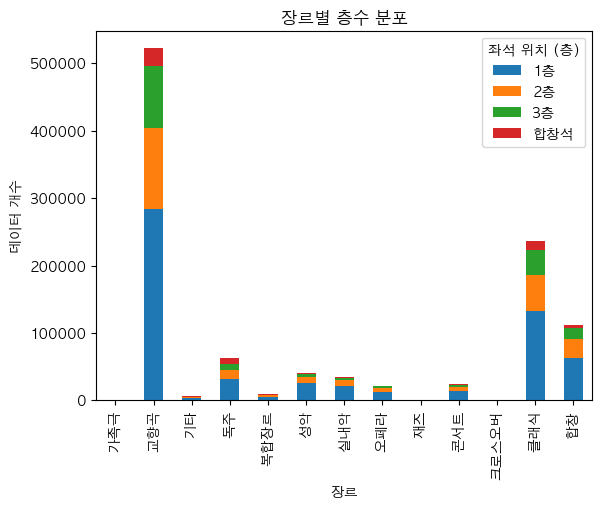

In [177]:
# 각 장르별 층수 분포 계산
genre_floor_counts = concert_df.groupby('genre')['floor'].value_counts().unstack(fill_value=0)

# 시각화
genre_floor_counts.plot(kind='bar', stacked=True)
plt.xlabel('장르')
plt.ylabel('데이터 개수')
plt.title('장르별 층수 분포')
plt.legend(title='좌석 위치 (층)')
plt.show()

    1층이 가장 많은 건 어쩌면 당연한 이야기..

In [185]:
# 층별 연령대 count
pd.crosstab(concert_df['floor'], concert_df['age'])

age,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
floor,,,,,,,,
1층,1871,23990,40669,55937,54893,33924,10380,4346
2층,1001,15856,19446,24265,27432,20094,5388,765
3층,678,14604,18060,24041,26007,18715,4658,544
합창석,223,4631,7548,10369,7209,4993,1303,666


### 11. 선예매여부

In [155]:
date_df = concert_df[['tran_date', 'open_date']]
date_df['tran_date'] - date_df['open_date']

0          -1
4          96
5           5
6          -3
7          11
           ..
1920853    -2
1920855    15
1920856    89
1920858     6
1920864     1
Length: 1096954, dtype: int64

In [157]:
date_df = concert_df[['tran_date', 'open_date']]
date_df['days_before_open'] = date_df['tran_date'] - date_df['open_date']
date_df[date_df['days_before_open']>0]

/var/folders/54/s310db954sz_m0tw8ybh860m0000gn/T/ipykernel_88268/1236990013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['days_before_open'] = date_df['tran_date'] - date_df['open_date']


,tran_date,open_date,days_before_open
4,20220206,20220110,96
5,20181124,20181119,5
7,20190613,20190602,11
9,20190703,20190413,290
13,20220624,20220430,194
...,...,...,...
1920850,20190929,20190906,23
1920855,20230522,20230507,15
1920856,20201009,20200920,89
1920858,20200726,20200720,6


In [165]:
concert_df[['tran_date', 'open_date']].isnull().sum()

tran_date    0
open_date    0
dtype: int64

In [166]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096954 entries, 0 to 1920864
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype
---  ------            --------------    -----
 0   tran_date         1096954 non-null  int64
 1   open_date         1096954 non-null  int64
 2   days_before_open  1096954 non-null  int64
 3   pre_ticketing     1096954 non-null  int64
dtypes: int64(4)
memory usage: 74.1 MB


In [167]:
# 선예매여부 따지는 함수
def if_pre(x):
    if x < 0:
        return 1        # 선예매 O
    else:
        return 0        # 선예매 X

In [170]:
date_df['pre_ticketing'] = date_df['days_before_open'].apply(lambda x: if_pre(x))
date_df

/var/folders/54/s310db954sz_m0tw8ybh860m0000gn/T/ipykernel_88268/627346578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['pre_ticketing'] = date_df['days_before_open'].apply(lambda x: if_pre(x))


,tran_date,open_date,days_before_open,pre_ticketing
0,20220114,20220115,-1,1
4,20220206,20220110,96,0
5,20181124,20181119,5,0
6,20191020,20191023,-3,1
7,20190613,20190602,11,0
...,...,...,...,...
1920853,20210618,20210620,-2,1
1920855,20230522,20230507,15,0
1920856,20201009,20200920,89,0
1920858,20200726,20200720,6,0


In [174]:
date_df['pre_ticketing'].value_counts(normalize=True)

0    0.862835
1    0.137165
Name: pre_ticketing, dtype: float64

In [172]:
concert_df = pd.concat([concert_df, date_df[['days_before_open', 'pre_ticketing']]], axis=1)
concert_df

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,membership_all,골드,그린,노블,무료,블루,싹틔우미,num_memberships,days_before_open,pre_ticketing
0,50.0,F,20220114,15:12,20220204,20:00,3층 BOX9 10,10000,2,일반,...,골드|무료|그린,1,1,0,1,0,0,3,-1,1
4,50.0,M,20220206,16:15,20220302,19:30,1층 B블록12열 7,180000,0,일반,...,무료,0,0,0,1,0,0,1,96,0
5,30.0,F,20181124,11:45,20190323,20:00,1층 A블록2열 1,144000,2,블루회원 할인20%,...,블루|무료,0,0,0,1,1,0,2,5,0
6,NaN,NaN,20191020,14:59,20191109,17:00,3층 E블록4열 8,0,0,초대권,...,nan,0,0,0,0,0,0,0,-3,1
7,NaN,NaN,20190613,09:54,20190723,20:00,2층 D블록8열 4,0,0,초대권,...,nan,0,0,0,0,0,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,20210618,15:09,20210704,15:00,1층 A블록2열 2,90000,2,일반,...,무료|그린,0,1,0,1,0,0,2,-2,1
1920855,50.0,M,20230522,17:29,20230613,17:00,3층 A블록6열 4,10000,0,일반,...,무료,0,0,0,1,0,0,1,15,0
1920856,NaN,NaN,20201009,16:52,20201020,19:30,1층 D블록16열 12,0,0,초대권,...,nan,0,0,0,0,0,0,0,89,0
1920858,NaN,NaN,20200726,16:55,20200818,19:30,1층 D블록20열 8,0,0,기획사판매,...,nan,0,0,0,0,0,0,0,6,0


In [186]:
# 데이터 중간 저장 (선예매여부 칼럼 포함 ver.)
concert_df.to_csv('/Users/jungsuryu/Documents/2023BigCon/concert_v1.csv')

In [274]:
concert_df[concert_df['play_st_time']=='10:00']

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,골드,그린,노블,무료,블루,싹틔우미,num_memberships,days_before_open,pre_ticketing,floor
2925,NaN,NaN,20211113,10:58,20211119,10:00,1층 E블록19열 1,0,2,초대권,...,0,0,0,0,0,0,0,103,0,1층
3833,NaN,NaN,20211113,11:04,20211119,10:00,1층 D블록18열 10,0,2,초대권,...,0,0,0,0,0,0,0,103,0,1층
5188,NaN,NaN,20211113,10:58,20211119,10:00,1층 E블록8열 7,0,2,초대권,...,0,0,0,0,0,0,0,103,0,1층
11310,NaN,NaN,20211113,11:07,20211119,10:00,1층 E블록6열 7,0,2,초대권,...,0,0,0,0,0,0,0,103,0,1층
13172,NaN,NaN,20211113,11:01,20211119,10:00,1층 E블록18열 4,0,2,초대권,...,0,0,0,0,0,0,0,103,0,1층
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912502,NaN,NaN,20211113,10:51,20211119,10:00,1층 C블록13열 11,0,0,초대권,...,0,0,0,0,0,0,0,103,0,1층
1912530,NaN,NaN,20211113,10:51,20211119,10:00,1층 C블록17열 3,0,0,초대권,...,0,0,0,0,0,0,0,103,0,1층
1916665,NaN,NaN,20211113,10:49,20211119,10:00,1층 C블록9열 5,0,0,초대권,...,0,0,0,0,0,0,0,103,0,1층
1920007,NaN,NaN,20211113,10:40,20211119,10:00,1층 A블록19열 6,0,0,초대권,...,0,0,0,0,0,0,0,103,0,1층


### 12. running_time & intermission

<Axes: xlabel='genre'>

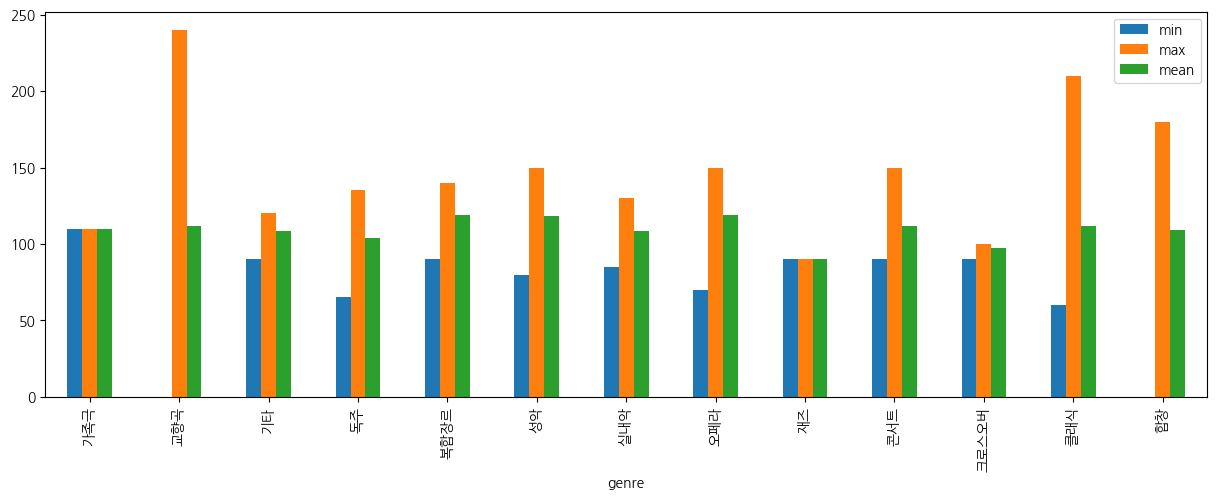

In [24]:
concert.groupby('genre')['running_time'].agg(['min', 'max', 'mean']).plot(kind='bar', figsize=(15, 5))

<Axes: xlabel='genre'>

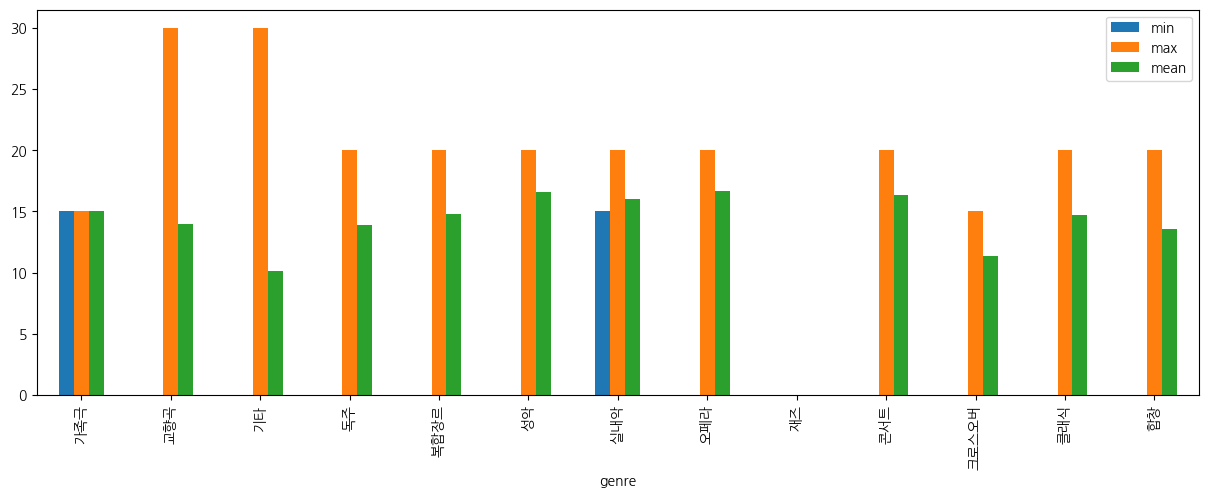

In [26]:
concert.groupby('genre')['intermission'].agg(['min', 'max', 'mean']).plot(kind='bar', figsize=(15, 5))

In [27]:
# running_time이 0인 공연 존재
concert[concert['running_time'] == 0]

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
188,60.0,F,블루,무료,NaN,NaN,NaN,NaN,20191208,1134,...,0,싹딜가(블루)50%,2495,20191011.0,20191013.0,교향곡,콘서트홀,0,30,Y
727,60.0,F,골드,무료,NaN,NaN,NaN,NaN,20191004,1610,...,2,얼리버드 할인(10월16일까지)50%,552,20191004.0,20191005.0,합창,콘서트홀,0,0,Y
1338,40.0,M,골드,무료,그린,NaN,NaN,NaN,20191013,1001,...,0,골드회원+음반패키지,2495,20191011.0,20191013.0,교향곡,콘서트홀,0,30,Y
1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190627,1343,...,0,기획사,2217,NaN,20190614.0,교향곡,콘서트홀,0,0,N
1469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191025,1536,...,0,주보할인30%,552,20191004.0,20191005.0,합창,콘서트홀,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917115,50.0,M,블루,무료,NaN,NaN,NaN,NaN,20191206,827,...,0,문화릴레이(1인2매/공연유료티켓소지자)20%,552,20191004.0,20191005.0,합창,콘서트홀,0,0,Y
1917970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190615,1638,...,0,초대권,2217,NaN,20190614.0,교향곡,콘서트홀,0,0,N
1918119,60.0,F,무료,NaN,NaN,NaN,NaN,NaN,20191025,149,...,2,일반,552,20191004.0,20191005.0,합창,콘서트홀,0,0,Y
1918792,20.0,M,무료,싹틔우미,NaN,NaN,NaN,NaN,20191108,1329,...,2,초/중/고/대학생 할인(본인만)50%,2495,20191011.0,20191013.0,교향곡,콘서트홀,0,30,Y


### 12. 이상치 있는 지 확인

In [76]:
concert[['age', 'price', 'running_time', 'intermission']].describe()

,age,price,running_time,intermission
count,484506.00,1096954.00,1096954.00,1096954.00
mean,43.02,29973.32,111.31,14.40
std,14.62,52311.54,16.56,5.85
min,10.00,0.00,0.00,0.00
25%,30.00,0.00,100.00,15.00
50%,40.00,0.00,120.00,15.00
75%,50.00,45000.00,120.00,15.00
max,80.00,480000.00,240.00,30.00


In [75]:
concert['price'].describe()

count   1096954.00
mean      29973.32
std       52311.54
min           0.00
25%           0.00
50%           0.00
75%       45000.00
max      480000.00
Name: price, dtype: float64

In [74]:
pd.options.display.float_format = '{:.2f}'.format

In [81]:
concert[(concert['membership_type_2']=='싹틔우미') | (concert['membership_type_3']=='싹틔우미') | concert['membership_type_4']=='싹틔우미']

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn


In [84]:
sprout = concert[(concert['discount_type'].str.contains('싹틔우미'))]
sprout

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
28,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-03-27,16:01,...,0,싹틔우미 할인40%,221,2023-02-25,2023-02-26,클래식,콘서트홀,150,15,Y
251,20.00,M,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-01-08,15:17,...,2,싹틔우미 할인40%,2084,2023-01-07,2023-01-08,교향곡,콘서트홀,120,0,Y
298,20.00,M,무료,싹틔우미,그린,NaN,NaN,NaN,2022-05-25,15:04,...,2,싹틔우미 할인40%,2803,2022-04-23,2022-04-24,교향곡,콘서트홀,110,15,Y
324,20.00,F,무료,싹틔우미,그린,NaN,NaN,NaN,2021-08-07,01:14,...,0,싹틔우미 할인40%,1714,2021-08-06,2021-08-07,클래식,콘서트홀,120,15,Y
818,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2021-06-02,23:27,...,0,싹틔우미 할인40%,895,2021-04-16,2021-04-19,클래식,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920436,20.00,M,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-02-09,17:46,...,2,싹틔우미 할인40%,2084,2023-01-07,2023-01-08,교향곡,콘서트홀,120,0,Y
1920456,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-02-26,05:52,...,0,싹틔우미 할인40%,2085,2023-01-07,2023-01-08,교향곡,콘서트홀,120,0,Y
1920497,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-06-29,20:05,...,0,싹틔우미 할인40%,918,2023-04-16,2023-04-22,교향곡,콘서트홀,120,20,Y
1920572,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-05-27,17:21,...,0,싹틔우미 할인40%,2824,2023-05-05,2023-05-07,교향곡,콘서트홀,120,15,Y


In [85]:
sprout.discount_type.unique()

array(['싹틔우미 할인40%', '싹틔우미 할인50%', '싹틔우미 할인'], dtype=object)

In [86]:
sprout.age.unique()

array([20., 10., 30., nan, 70., 50., 40.])

In [87]:
sprout[sprout.age==70]

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
52122,70.00,M,무료,노블,그린,NaN,NaN,NaN,2022-08-12,17:26,...,2,싹틔우미 할인40%,2756,2022-08-05,2022-08-06,교향곡,콘서트홀,101,20,Y
1194327,70.00,M,골드,무료,노블,NaN,NaN,NaN,2022-08-13,16:03,...,0,싹틔우미 할인40%,2756,2022-08-05,2022-08-06,교향곡,콘서트홀,101,20,Y


In [100]:
sprout[sprout.age==70]['price']

52122       30000
1194327    138000
Name: price, dtype: int64

In [102]:
sprout['price'].max()

240000

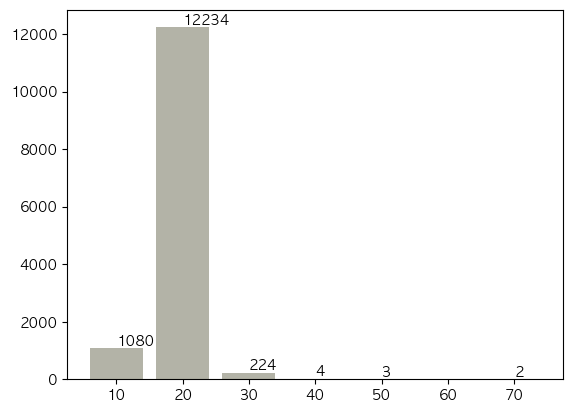

In [89]:
x = sprout['age'].value_counts().index
y = sprout['age'].value_counts().values
bars = plt.bar(x, y, width=8, color='#B3B3A7')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()

In [91]:
stu = concert[(concert['discount_type'].str.contains('초/중/고/'))]
stu

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
219,30.00,F,블루,무료,싹틔우미,그린,NaN,NaN,2021-10-15,08:51,...,2,초/중/고/대학생 할인(본인만)50%,448,2021-09-17,2021-09-18,교향곡,콘서트홀,100,15,Y
272,40.00,F,무료,NaN,NaN,NaN,NaN,NaN,2021-07-14,22:39,...,0,초/중/고/대학생 할인30%,2505,2021-06-05,2021-06-06,교향곡,콘서트홀,110,15,Y
763,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2019-08-30,00:41,...,2,초/중/고/대학생 할인50%,452,2019-07-29,2019-08-02,교향곡,콘서트홀,71,15,Y
992,20.00,M,무료,싹틔우미,NaN,NaN,NaN,NaN,2019-01-29,12:23,...,2,초/중/고/대학생 할인(본인만)50%,2497,2018-12-16,2018-12-17,교향곡,콘서트홀,100,15,Y
1021,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-04-12,18:21,...,0,초/중/고/대학생 할인(본인만)50%,537,2022-12-30,2022-12-31,교향곡,콘서트홀,105,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919284,20.00,F,무료,NaN,NaN,NaN,NaN,NaN,2023-02-25,10:36,...,2,초/중/고/대학생 할인(본인만)50%,1200,NaT,2023-02-25,교향곡,콘서트홀,90,15,Y
1919886,50.00,F,블루,골드,무료,NaN,NaN,NaN,2023-02-27,13:37,...,2,초/중/고/대학생 할인50%,2365,NaT,2023-02-18,실내악,콘서트홀,110,20,Y
1920212,50.00,F,블루,무료,NaN,NaN,NaN,NaN,2019-01-23,14:28,...,0,초/중/고/대학생 할인(본인만)50%,2497,2018-12-16,2018-12-17,교향곡,콘서트홀,100,15,Y
1920220,40.00,F,무료,NaN,NaN,NaN,NaN,NaN,2022-06-18,15:06,...,0,초/중/고/대학생 할인(본인만)50%,534,2022-06-17,2022-06-18,교향곡,콘서트홀,90,15,Y


In [92]:
stu.discount_type.unique()

array(['초/중/고/대학생 할인(본인만)50%', '초/중/고/대학생 할인30%', '초/중/고/대학생 할인50%',
       '초/중/고/대학생 할인(본인만)20%', '초/중/고/대학생 할인(1인2매)20%',
       '초/중/고/대학생 할인(1인1매)50%', '초/중/고/대학생 할인(본인)50%',
       '초/중/고/대학생 할인(동반1인)10%', '초/중/고/대학생(본인만)50%', '초/중/고/대학생 할인20%',
       '초/중/고/대학(원)생 할인(본인만)50%', '초/중/고/대학생(대학원생) 할인30%',
       '초/중/고/대학생 할인(본인만)30%', '초/중/고/대학생 할인15%', '초/중/고/대학(원)생(동반1인)20%',
       '초/중/고/대학(원)생 할인50%', '초/중/고/대학(원)생 할인(본인)50%',
       '초/중/고/대학(원)생 할인(1인1매)30%', '초/중/고/대학(원)생 할인(본인만)25%',
       '초/중/고/대학생 할인(본인만)', '초/중/고/대학(원)생 할인20%', '초/중/고/대학생(본인)50%',
       '초/중/고/대학생(동반1인)40%', '초/중/고/대학생(본인만)15%',
       '초/중/고/대학(원)생 할인(동반1인)20%', '초/중/고/대학생(동반1인까지)50%',
       '초/중/고/대학(원)생 할인30%', '초/중/고/대학생 할인40%', '초/중/고/대학생 할인(본인만)40%',
       '초/중/고/대학(원)생 할인(1인2매)50%', '초/중/고/대학(원)생(1인2매)30%',
       '초/중/고/대학생 할인(본인만)25%', '초/중/고/대학(원)생 할인(동반1인)50%',
       '초/중/고/대학생 할인(본인만)15%', '초/중/고/대학(원)생 할인40%',
       '초/중/고/대학생(본인)+음반패키지', '초/중/고/대학생(대학원생) 할인50%'], dtype=object)

In [93]:
stu.age.unique()

array([30., 40., 20., nan, 50., 10., 60., 80., 70.])

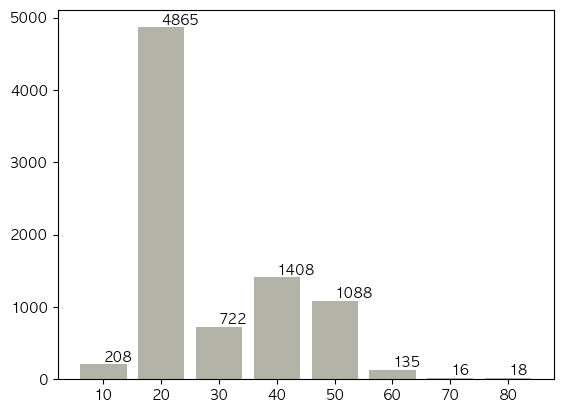

In [94]:
x = stu['age'].value_counts().index
y = stu['age'].value_counts().values
bars = plt.bar(x, y, width=8, color='#B3B3A7')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()

In [95]:
honor = concert[(concert['discount_type'].str.contains('국가유공자'))]
honor

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
39,40.00,F,골드,무료,NaN,NaN,NaN,NaN,2020-03-06,20:48,...,0,장애인/국가유공자 할인50%,317,NaT,2020-07-04,교향곡,콘서트홀,120,15,Y
152,50.00,F,무료,NaN,NaN,NaN,NaN,NaN,2021-11-12,17:11,...,2,장애인/국가유공자 할인50%,521,2021-11-12,2021-11-12,교향곡,콘서트홀,80,0,Y
172,40.00,F,블루,골드,무료,그린,NaN,NaN,2021-10-24,02:03,...,2,장애인/국가유공자 할인50%,879,2021-10-22,2021-10-23,교향곡,콘서트홀,120,15,Y
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-28,13:05,...,0,장애인/국가유공자 할인50%,43,NaT,2018-12-16,합창,콘서트홀,100,15,N
517,50.00,F,무료,NaN,NaN,NaN,NaN,NaN,2022-05-06,09:22,...,0,장애인/국가유공자 할인50%,793,NaT,2022-04-22,실내악,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920393,70.00,M,골드,무료,NaN,NaN,NaN,NaN,2023-01-09,11:28,...,0,"국가유공자,의상자1~2급(동반1인)50%",2085,2023-01-07,2023-01-08,교향곡,콘서트홀,120,0,Y
1920457,40.00,F,블루,무료,NaN,NaN,NaN,NaN,2019-11-26,10:36,...,0,장애인/국가유공자 할인50%,1161,NaT,2019-10-05,실내악,콘서트홀,110,15,Y
1920501,30.00,M,골드,무료,그린,NaN,NaN,NaN,2022-09-11,12:31,...,2,장애인/국가유공자 할인50%,2730,2022-08-20,2022-08-21,실내악,콘서트홀,110,20,Y
1920570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-25,11:42,...,0,장애인/국가유공자 할인50%,2512,2023-02-11,2023-02-12,합창,콘서트홀,180,20,N


In [96]:
young = concert[(concert['discount_type'].str.contains('청년패스'))]
young

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
18593,20.00,M,무료,싹틔우미,NaN,NaN,NaN,NaN,2022-04-14,13:16,...,2,"청년패스(만24세이하,대학생/본인)30%",499,2022-03-20,2022-03-21,교향곡,콘서트홀,100,15,Y
25623,50.00,F,무료,NaN,NaN,NaN,NaN,NaN,2022-03-06,11:53,...,2,"청년패스(만24세이하,대학생/본인)30%",498,2022-02-19,2022-02-20,교향곡,콘서트홀,100,15,Y
59583,50.00,M,블루,무료,그린,NaN,NaN,NaN,2020-01-11,12:45,...,2,청년패스(만24세이하/본인)30%,495,2020-07-17,2020-07-18,교향곡,콘서트홀,80,0,Y
69750,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2021-05-06,19:08,...,0,"청년패스(만24세이하,대학생/본인)30%",500,2021-04-09,2021-04-10,교향곡,콘서트홀,85,15,Y
82324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-15,11:37,...,0,"청년패스(만24세이하,대학생/본인)30%",499,2022-03-20,2022-03-21,교향곡,콘서트홀,100,15,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836078,40.00,M,무료,NaN,NaN,NaN,NaN,NaN,2022-05-27,09:51,...,0,"청년패스(만24세이하,대학생/본인)30%",499,2022-03-20,2022-03-21,교향곡,콘서트홀,100,15,Y
1858454,20.00,M,무료,싹틔우미,그린,NaN,NaN,NaN,2023-03-25,14:48,...,2,"청년패스(만24세이하,대학생/본인)30%",497,NaT,2022-12-25,교향곡,콘서트홀,110,0,Y
1866798,20.00,F,무료,싹틔우미,NaN,NaN,NaN,NaN,2023-04-07,23:23,...,0,"청년패스(만24세이하,대학생/본인)30%",497,NaT,2022-12-25,교향곡,콘서트홀,110,0,Y
1873637,20.00,M,무료,싹틔우미,NaN,NaN,NaN,NaN,2021-03-16,23:55,...,0,청년패스(만24세이하/본인)30%,503,2021-02-20,2021-02-21,교향곡,콘서트홀,85,15,Y


In [97]:
young.discount_type.unique()

array(['청년패스(만24세이하,대학생/본인)30%', '청년패스(만24세이하/본인)30%'], dtype=object)

In [98]:
young.age.unique()

array([20., 50., nan, 40., 30., 10.])

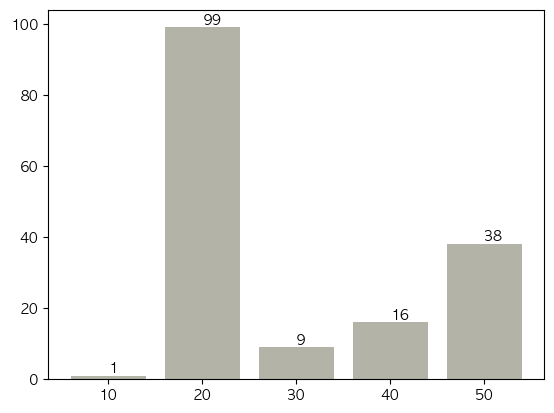

In [99]:
x = young['age'].value_counts().index
y = young['age'].value_counts().values
bars = plt.bar(x, y, width=8, color='#B3B3A7')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()